# Analyse des causes d'attrition chez TechNova Partners
# Étape 1 : Analyse Exploratoire des Données

**Objectif** : Identifier les différences clés entre les employés ayant quitté l'entreprise et ceux qui y sont encore.

## 1. Importation des bibliothèques

In [40]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 2. Chargement des 3 fichiers de données

In [41]:
# Chargement des fichiers CSV
df_sirh = pd.read_csv('extrait_sirh.csv')
df_eval = pd.read_csv('extrait_eval.csv')
df_sondage = pd.read_csv('extrait_sondage.csv')

print("📊 Fichiers chargés avec succès :")
print(f"  - SIRH : {df_sirh.shape[0]} lignes, {df_sirh.shape[1]} colonnes")
print(f"  - Évaluations : {df_eval.shape[0]} lignes, {df_eval.shape[1]} colonnes")
print(f"  - Sondage : {df_sondage.shape[0]} lignes, {df_sondage.shape[1]} colonnes")

📊 Fichiers chargés avec succès :
  - SIRH : 1470 lignes, 12 colonnes
  - Évaluations : 1470 lignes, 10 colonnes
  - Sondage : 1470 lignes, 12 colonnes


## 3. Premier aperçu de chaque fichier

### 3.1 Fichier SIRH (Système d'Information des Ressources Humaines)

In [42]:
print("📋 Structure du fichier SIRH :")
print("\nColonnes :")
print(df_sirh.columns.tolist())
print("\nPremières lignes :")
df_sirh.head()

📋 Structure du fichier SIRH :

Colonnes :
['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']

Premières lignes :


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [43]:
print("📊 Informations sur le fichier SIRH :")
df_sirh.info()

📊 Informations sur le fichier SIRH :
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   id_employee                     1470 non-null   int64
 1   age                             1470 non-null   int64
 2   genre                           1470 non-null   str  
 3   revenu_mensuel                  1470 non-null   int64
 4   statut_marital                  1470 non-null   str  
 5   departement                     1470 non-null   str  
 6   poste                           1470 non-null   str  
 7   nombre_experiences_precedentes  1470 non-null   int64
 8   nombre_heures_travailless       1470 non-null   int64
 9   annee_experience_totale         1470 non-null   int64
 10  annees_dans_l_entreprise        1470 non-null   int64
 11  annees_dans_le_poste_actuel     1470 non-null   int64
dtypes: int64(8), str(4)
memory usage: 13

In [49]:
print("liste des catégories de SIRH:")
print("_"*80)
print(df_sirh['genre'].unique())
print("_"*80)
print(df_sirh['statut_marital'].unique())
print("_"*80)
print(df_sirh['departement'].unique())
print("_"*80)
print(df_sirh['poste'].unique())

liste des catégories de SIRH:
________________________________________________________________________________
<StringArray>
['F', 'M']
Length: 2, dtype: str
________________________________________________________________________________
<StringArray>
['Célibataire', 'Marié(e)', 'Divorcé(e)']
Length: 3, dtype: str
________________________________________________________________________________
<StringArray>
['Commercial', 'Consulting', 'Ressources Humaines']
Length: 3, dtype: str
________________________________________________________________________________
<StringArray>
[       'Cadre Commercial',  'Assistant de Direction',
              'Consultant',               'Tech Lead',
                 'Manager',          'Senior Manager',
 'Représentant Commercial',     'Directeur Technique',
     'Ressources Humaines']
Length: 9, dtype: str


### 3.2 Fichier Évaluations

In [6]:
print("📋 Structure du fichier Évaluations :")
print("\nColonnes :")
print(df_eval.columns.tolist())
print("\nPremières lignes :")
df_eval.head()

📋 Structure du fichier Évaluations :

Colonnes :
['satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente']

Premières lignes :


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [7]:
print("📊 Informations sur le fichier Évaluations :")
df_eval.info()

📊 Informations sur le fichier Évaluations :
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   satisfaction_employee_environnement        1470 non-null   int64
 1   note_evaluation_precedente                 1470 non-null   int64
 2   niveau_hierarchique_poste                  1470 non-null   int64
 3   satisfaction_employee_nature_travail       1470 non-null   int64
 4   satisfaction_employee_equipe               1470 non-null   int64
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64
 6   eval_number                                1470 non-null   str  
 7   note_evaluation_actuelle                   1470 non-null   int64
 8   heure_supplementaires                      1470 non-null   str  
 9   augementation_salaire_precedente           1470 non-null   str  
dtypes: int64(7), st

In [8]:
print("liste des catégories :")
print(df_eval['eval_number'].unique())
print("-"*80)
print(df_eval['heure_supplementaires'].unique())
print("-"*80)
print(df_eval['augementation_salaire_precedente'].unique())

liste des catégories :
<StringArray>
[   'E_1',    'E_2',    'E_4',    'E_5',    'E_7',    'E_8',   'E_10',
   'E_11',   'E_12',   'E_13',
 ...
 'E_2054', 'E_2055', 'E_2056', 'E_2057', 'E_2060', 'E_2061', 'E_2062',
 'E_2064', 'E_2065', 'E_2068']
Length: 1470, dtype: str
--------------------------------------------------------------------------------
<StringArray>
['Oui', 'Non']
Length: 2, dtype: str
--------------------------------------------------------------------------------
<StringArray>
['11 %', '23 %', '15 %', '12 %', '13 %', '20 %', '22 %', '21 %', '17 %',
 '14 %', '16 %', '18 %', '19 %', '24 %', '25 %']
Length: 15, dtype: str


### 3.3 Fichier Sondage (avec variable cible)

In [9]:
print("📋 Structure du fichier Sondage :")
print("\nColonnes :")
print(df_sondage.columns.tolist())
print("\nPremières lignes :")
df_sondage.head()

📋 Structure du fichier Sondage :

Colonnes :
['a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'code_sondage', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']

Premières lignes :


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [10]:
print("📊 Informations sur le fichier Sondage :")
df_sondage.info()

📊 Informations sur le fichier Sondage :
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   a_quitte_l_entreprise                1470 non-null   str  
 1   nombre_participation_pee             1470 non-null   int64
 2   nb_formations_suivies                1470 non-null   int64
 3   nombre_employee_sous_responsabilite  1470 non-null   int64
 4   code_sondage                         1470 non-null   int64
 5   distance_domicile_travail            1470 non-null   int64
 6   niveau_education                     1470 non-null   int64
 7   domaine_etude                        1470 non-null   str  
 8   ayant_enfants                        1470 non-null   str  
 9   frequence_deplacement                1470 non-null   str  
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64
 11  annes_sous_responsable_actu

In [11]:
print("liste des catégories :")
print(df_sondage['domaine_etude'].unique())
print(df_sondage['a_quitte_l_entreprise'].unique())
print(df_sondage['ayant_enfants'].unique())
print(df_sondage['frequence_deplacement'].unique())

liste des catégories :
<StringArray>
[          'Infra & Cloud',                   'Autre',
 'Transformation Digitale',               'Marketing',
         'Entrepreunariat',     'Ressources Humaines']
Length: 6, dtype: str
<StringArray>
['Oui', 'Non']
Length: 2, dtype: str
<StringArray>
['Y']
Length: 1, dtype: str
<StringArray>
['Occasionnel', 'Frequent', 'Aucun']
Length: 3, dtype: str


---
## 4.Identification et nettoyage des colonnes

**Objectif :** Identifier les variables quantitatives et qualitatives, et nettoyer les données si nécessaire.
Variable qualitative pouvant etre converties en quantitative 'eval_number' et ' augmentation_salaire', distribution de 'ayant_enfants'

### 4.1 Nettoyage nécessaire : Variable 'augmentation_salaire_precedente'

In [12]:
# Examiner la colonne augementation_salaire_precedente
print("🔍 Analyse de la colonne 'augementation_salaire_precedente' :")
print("\nType actuel :", df_eval['augementation_salaire_precedente'].dtype)
print("\nValeurs uniques (échantillon) :")
print(df_eval['augementation_salaire_precedente'].unique()[:10])

print("="*70)
print("\n🔍 Analyse de la colonne 'eval_number' :")
print("\nType actuel :", df_eval['eval_number'].dtype)
print("\nValeurs uniques (échantillon) :")
print(df_eval['eval_number'].unique()[:10])

print("="*70)
print("\n🔍 Analyse de la colonne 'ayant_enfants' :")
print("\nType actuel :", df_sondage['ayant_enfants'].dtype)
print("\nValeurs uniques (échantillon) :")
print(df_sondage['ayant_enfants'].unique()[:10])

🔍 Analyse de la colonne 'augementation_salaire_precedente' :

Type actuel : str

Valeurs uniques (échantillon) :
<StringArray>
['11 %', '23 %', '15 %', '12 %', '13 %', '20 %', '22 %', '21 %', '17 %',
 '14 %']
Length: 10, dtype: str

🔍 Analyse de la colonne 'eval_number' :

Type actuel : str

Valeurs uniques (échantillon) :
<StringArray>
['E_1', 'E_2', 'E_4', 'E_5', 'E_7', 'E_8', 'E_10', 'E_11', 'E_12', 'E_13']
Length: 10, dtype: str

🔍 Analyse de la colonne 'ayant_enfants' :

Type actuel : str

Valeurs uniques (échantillon) :
<StringArray>
['Y']
Length: 1, dtype: str


### 4.2 Conversion des colonnes 'augementation_salaire_precedente' ; 'eval_number' et supression de la colonne 'ayant_enfants'

In [13]:
# Conversion des colonnes 'augementation_salaire_precedente' ; 'eval_number'
# Suppression de la colonne 'ayant_enfats'

def nettoyer_pourcentage(valeur):
    """
    Nettoie une valeur de pourcentage au format '11 %' et la convertit en entier.
    """
    if pd.isna(valeur):
        return np.nan
    # Retirer les espaces et le symbole %
    valeur_nettoyee = str(valeur).strip().replace(' ', '').replace('%', '')
    try:
        return int(valeur_nettoyee)
    except:
        return np.nan

# Appliquer la fonction de nettoyage
df_eval['augmentation_salaire_precedente'] = df_eval['augementation_salaire_precedente'].apply(nettoyer_pourcentage)

#enlever les 2 premier caractères de 'eval_number'
def extraire_nr(valeur):
    return int(valeur.replace('E_',''))
    
df_eval['eval_number_int'] = df_eval['eval_number'].apply(extraire_nr)

# suppression colonne 'ayant_enfants'
df_sondage = df_sondage.drop('ayant_enfants', axis=1)
df_eval = df_eval.drop('augementation_salaire_precedente', axis=1)
df_eval = df_eval.drop('eval_number', axis=1)

print("\n ✅ Type de la nouvelle colonne pour 'augmentation_salaire_precedente' :", df_eval['augmentation_salaire_precedente'].dtype)
print("\nStatistiques Salaires précédents :")
print((df_eval['augmentation_salaire_precedente'].describe()).round(2))
print("="*70)
print("\n ✅ Type de la nouvelle colonne pour 'eval_number_int':", df_eval['eval_number_int'].dtype)
print(f"{'='*80}\n")
print("\nStatistiques Evaluation :")
print((df_eval['eval_number_int'].describe()).round(2))

print("="*70)
print("✅ Suppression de la colonne 'ayant_enfants'")
print(f"{'='*80}\n")
print(df_sondage.info())
print("📊 Composition du Dataset :")
print(f"  - Évaluations : {df_eval.shape[0]} lignes, {df_eval.shape[1]} colonnes")
print(f"  - Sondage : {df_sondage.shape[0]} lignes, {df_sondage.shape[1]} colonnes")


 ✅ Type de la nouvelle colonne pour 'augmentation_salaire_precedente' : int64

Statistiques Salaires précédents :
count    1470.00
mean       15.21
std         3.66
min        11.00
25%        12.00
50%        14.00
75%        18.00
max        25.00
Name: augmentation_salaire_precedente, dtype: float64

 ✅ Type de la nouvelle colonne pour 'eval_number_int': int64


Statistiques Evaluation :
count    1470.00
mean     1024.87
std       602.02
min         1.00
25%       491.25
50%      1020.50
75%      1555.75
max      2068.00
Name: eval_number_int, dtype: float64
✅ Suppression de la colonne 'ayant_enfants'

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   a_quitte_l_entreprise                1470 non-null   str  
 1   nombre_participation_pee             1470 non-null   int64
 2   nb_formations_suivies        

### 4.3 Détection des valeurs manquantes

In [14]:
def analyser_valeurs_manquantes(df, nom_fichier):
    print(f"\n{'='*80}")
    print(f"VALEURS MANQUANTES - {nom_fichier}")
    print(f"{'='*80}\n")
    
    valeurs_manquantes = df.isnull().sum()
    pourcentage_manquant = (valeurs_manquantes / len(df)) * 100
    
    df_missing = pd.DataFrame({
        'Colonne': valeurs_manquantes.index,
        'Nb_manquantes': valeurs_manquantes.values,
        'Pourcentage': pourcentage_manquant.values
    })
    
    # Filtrer seulement les colonnes avec des valeurs manquantes
    df_missing = df_missing[df_missing['Nb_manquantes'] > 0].sort_values('Nb_manquantes', ascending=False)
    
    if len(df_missing) == 0:
        print("✅ Aucune valeur manquante détectée")
    else:
        print(df_missing.to_string(index=False))
    
    return df_missing

# Analyser les valeurs manquantes
missing_sirh = analyser_valeurs_manquantes(df_sirh, "SIRH")
missing_eval = analyser_valeurs_manquantes(df_eval, "Évaluations")
missing_sondage = analyser_valeurs_manquantes(df_sondage, "Sondage")


VALEURS MANQUANTES - SIRH

✅ Aucune valeur manquante détectée

VALEURS MANQUANTES - Évaluations

✅ Aucune valeur manquante détectée

VALEURS MANQUANTES - Sondage

✅ Aucune valeur manquante détectée


---
## 5.Identification des clés de jointure

### 5.1 Colonnes potentielles pour les jointures 

In [15]:
print("🔑  Colonnes potentielles pour les jointures :")
print(f"\n- SIRH : id_employee (format : {df_sirh['id_employee'].iloc[0]})")
print(f"  Valeurs uniques : {df_sirh['id_employee'].nunique()} / {len(df_sirh)} lignes")
print(f"\n- Évaluations : eval_number (format : {df_eval['eval_number_int'].iloc[0]})")
print(f"  Valeurs uniques : {df_eval['eval_number_int'].nunique()} / {len(df_eval)} lignes")
print(f"\n- Sondage : code_sondage (format : {df_sondage['code_sondage'].iloc[0]})")
print(f"  Valeurs uniques : {df_sondage['code_sondage'].nunique()} / {len(df_sondage)} lignes")

print("\n💡 OBSERVATION :")
print("Les 3 fichiers ont des identifiants différents (id_employee, eval_number, code_sondage).")
print("Il faudra utiliser l'index de ligne comme clé de jointure car les fichiers sont")
print("déjà alignés (même ordre de 1470 employés).")

🔑  Colonnes potentielles pour les jointures :

- SIRH : id_employee (format : 1)
  Valeurs uniques : 1470 / 1470 lignes

- Évaluations : eval_number (format : 1)
  Valeurs uniques : 1470 / 1470 lignes

- Sondage : code_sondage (format : 1)
  Valeurs uniques : 1470 / 1470 lignes

💡 OBSERVATION :
Les 3 fichiers ont des identifiants différents (id_employee, eval_number, code_sondage).
Il faudra utiliser l'index de ligne comme clé de jointure car les fichiers sont
déjà alignés (même ordre de 1470 employés).


### 5.2 Distribution des clés potentielles de jointure

In [16]:
print(" 🔑 DISTRIBUTION DES CLÉS POTENTIELLES DE JOINTURE\n")
# Distribution
print("SIRH - id_employee :", df_sirh['id_employee'].head(5).tolist())
print("\n ✅ Type de la colonne pour 'id_employee':", df_sirh['id_employee'].dtype)
print(f"{'='*80}\n")
print("Eval - eval_number_int :", df_eval['eval_number_int'].head(5).tolist())
print("\n ✅ Type de la colonne pour 'eval_number_int':", df_eval['eval_number_int'].dtype)
print(f"{'='*80}\n")
print(" ✅ Sondage - code_sondage :", df_sondage['code_sondage'].head(5).tolist())
print("\nType de la colonne pour 'code_sondage':", df_sondage['code_sondage'].dtype)
print(f"{'='*80}\n")


 🔑 DISTRIBUTION DES CLÉS POTENTIELLES DE JOINTURE

SIRH - id_employee : [1, 2, 4, 5, 7]

 ✅ Type de la colonne pour 'id_employee': int64

Eval - eval_number_int : [1, 2, 4, 5, 7]

 ✅ Type de la colonne pour 'eval_number_int': int64

 ✅ Sondage - code_sondage : [1, 2, 4, 5, 7]

Type de la colonne pour 'code_sondage': int64



In [17]:
print(" 🔑  Vérification que l'ensemble des lignes des 3 colonnes correspondent")
print("="*80)

# Vérifier si TOUTES les valeurs correspondent
sirh_eval_match = (df_sirh['id_employee'].values == df_eval['eval_number_int'].values).all()
sirh_sondage_match = (df_sirh['id_employee'].values == df_sondage['code_sondage'].values).all()
eval_sondage_match = (df_eval['eval_number_int'].values == df_sondage['code_sondage'].values).all()

print(f"✅ SIRH ↔ Évaluations : {sirh_eval_match}")
print(f"✅ SIRH ↔ Sondage : {sirh_sondage_match}")
print(f"✅ Évaluations ↔ Sondage : {eval_sondage_match}")

if sirh_eval_match and sirh_sondage_match and eval_sondage_match:
    print("\n🎯 CONCLUSION : Les 3 fichiers sont parfaitement alignés !")
else:
    print("\n⚠️ ATTENTION : Les fichiers ne sont pas complètement alignés.")

 🔑  Vérification que l'ensemble des lignes des 3 colonnes correspondent
✅ SIRH ↔ Évaluations : True
✅ SIRH ↔ Sondage : True
✅ Évaluations ↔ Sondage : True

🎯 CONCLUSION : Les 3 fichiers sont parfaitement alignés !


---
## 6. Fusion des 3 fichiers : création de de df_complet

**Objectif :** Créer un DataFrame central unique combinant les informations des 3 sources.

### 6.1 Méthode 1 : Fusion par concatenation (fichiers alignés)

In [18]:
print("🔍Nombre de colonnes qu'on doit trouver après fusion")
print("="*80)

# Vérifier qu'on a bien toutes les colonnes
print(f"  - SIRH : {len(df_sirh.columns)} colonnes")
print(f"  - Évaluations : {len(df_eval.columns)} colonnes")
print(f"  - Sondage : {len(df_sondage.columns)} colonnes")
print(f"  - Total attendu : {len(df_sirh.columns) + len(df_eval.columns) + len(df_sondage.columns)}")


🔍Nombre de colonnes qu'on doit trouver après fusion
  - SIRH : 12 colonnes
  - Évaluations : 10 colonnes
  - Sondage : 11 colonnes
  - Total attendu : 33


In [19]:
#fusion des tableaux 
df_complet = pd.concat([df_sirh, df_eval, df_sondage], axis=1)

print(f"\n ✅ Dimensions du DataFrame complet : {df_complet.shape}")
print(f"  - {df_complet.shape[0]} lignes (employés)")
print(f"  - {df_complet.shape[1]} colonnes")

print("\n📋 Aperçu du DataFrame complet :")
df_complet.head()


 ✅ Dimensions du DataFrame complet : (1470, 33)
  - 1470 lignes (employés)
  - 33 colonnes

📋 Aperçu du DataFrame complet :


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augmentation_salaire_precedente,eval_number_int,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,3,Oui,11,1,Oui,0,0,1,1,1,2,Infra & Cloud,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,4,Non,23,2,Non,1,3,1,2,8,1,Infra & Cloud,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,3,Oui,15,4,Oui,0,3,1,4,2,2,Autre,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,3,Oui,11,5,Non,0,3,1,5,3,4,Infra & Cloud,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,3,Non,12,7,Non,1,3,1,7,2,1,Transformation Digitale,Occasionnel,2,2


### 6.3 Nettoyage des colonnes redondantes

#### a/ Feature avec une valeur unique

In [20]:
features_une_valeur = []
details_features = []

for colonne in df_complet.columns:
    nb_valeurs_uniques = df_complet[colonne].nunique()
    if nb_valeurs_uniques == 1:
        valeur_unique = df_complet[colonne].unique()[0]
        features_une_valeur.append(colonne) 
        details_features.append({
            'Feature': colonne,
            'Valeur unique': valeur_unique,
            'Type': df_complet[colonne].dtype
        })

print(f"\n⚠️  {len(features_une_valeur)} feature(s) avec une seule valeur détectée(s) :\n")
df_une_valeur = pd.DataFrame(details_features)
print(df_une_valeur.to_string(index=False))

df_complet = df_complet.drop(columns=features_une_valeur)



⚠️  2 feature(s) avec une seule valeur détectée(s) :

                            Feature  Valeur unique  Type
          nombre_heures_travailless             80 int64
nombre_employee_sous_responsabilite              1 int64


___

Ces deux features ont une unique donnée. 
Cela n'est pas représentatif pour notre modélisation.

---

#### b/ Features redondantes
On supprime :
- code_sondage 
- eval_number  

car on garde uniquement id_employee comme identifiant

In [21]:
print("🧹 Nettoyage des colonnes de jointures redondantes\n")
print("="*80)

colonnes_redondante = []

if 'code_sondage' in df_complet.columns:
    colonnes_redondante.append('code_sondage')

if 'eval_number_int' in df_complet.columns:
    colonnes_redondante.append('eval_number_int')

print(f"Colonnes à supprimer : {colonnes_redondante}")

df_complet = df_complet.drop(columns=colonnes_redondante)


🧹 Nettoyage des colonnes de jointures redondantes

Colonnes à supprimer : ['code_sondage', 'eval_number_int']


In [22]:
df_complet.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   id_employee                                1470 non-null   int64
 1   age                                        1470 non-null   int64
 2   genre                                      1470 non-null   str  
 3   revenu_mensuel                             1470 non-null   int64
 4   statut_marital                             1470 non-null   str  
 5   departement                                1470 non-null   str  
 6   poste                                      1470 non-null   str  
 7   nombre_experiences_precedentes             1470 non-null   int64
 8   annee_experience_totale                    1470 non-null   int64
 9   annees_dans_l_entreprise                   1470 non-null   int64
 10  annees_dans_le_poste_actuel                1470 non-null   

## 7. Analyse Variables

### 7.1 variables numériques

In [23]:
variables_quantitatives = df_complet.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_qualitatives = df_complet.select_dtypes(include=['object']).columns.tolist()

print("🔢 VARIABLES QUANTITATIVES (numériques) :\n")
for i, col in enumerate(variables_quantitatives, 1):
    print(f"{i:2d}. {col}")

print(f"\n📝 VARIABLES QUALITATIVES (catégorielles) :\n")
for i, col in enumerate(variables_qualitatives, 1):
    print(f"{i:2d}. {col}")

🔢 VARIABLES QUANTITATIVES (numériques) :

 1. id_employee
 2. age
 3. revenu_mensuel
 4. nombre_experiences_precedentes
 5. annee_experience_totale
 6. annees_dans_l_entreprise
 7. annees_dans_le_poste_actuel
 8. satisfaction_employee_environnement
 9. note_evaluation_precedente
10. niveau_hierarchique_poste
11. satisfaction_employee_nature_travail
12. satisfaction_employee_equipe
13. satisfaction_employee_equilibre_pro_perso
14. note_evaluation_actuelle
15. augmentation_salaire_precedente
16. nombre_participation_pee
17. nb_formations_suivies
18. distance_domicile_travail
19. niveau_education
20. annees_depuis_la_derniere_promotion
21. annes_sous_responsable_actuel

📝 VARIABLES QUALITATIVES (catégorielles) :

 1. genre
 2. statut_marital
 3. departement
 4. poste
 5. heure_supplementaires
 6. a_quitte_l_entreprise
 7. domaine_etude
 8. frequence_deplacement


/tmp/ipykernel_205230/1809678199.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  variables_qualitatives = df_complet.select_dtypes(include=['object']).columns.tolist()


#### a/ Distribution de variables numériques

In [24]:
print("\n" + "="*100)
print("Distribution Revenu Mensuel")
print("="*100)
print(df_complet['revenu_mensuel'].describe())
print("\n" + "="*100)
print("Distribution Année dans l'entreprise")
print("="*100)
print(df_complet['annees_dans_l_entreprise'].describe())
print("\n" + "="*100)
print("Distribution Age")
print("="*100)
print(df_complet['age'].describe())


Distribution Revenu Mensuel
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: revenu_mensuel, dtype: float64

Distribution Année dans l'entreprise
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: annees_dans_l_entreprise, dtype: float64

Distribution Age
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64


### 7.2 Encoding des variables catégorielles
Selon l'étude plus haut je vais appliquer le OneHotEncoding pour toutes les variables catégoriels, sauf la frequence_deplacement qui sera LabelEncoding.

In [25]:
# Sélectionner toutes les colonnes de type 'object' (texte)
df_categoriel = df_complet.select_dtypes(include=['object'])

print("Nombre de variables catégorielles :", df_categoriel.shape[1])
print("\nListe des variables catégorielles :")
display(df_categoriel.columns.tolist())

Nombre de variables catégorielles : 8

Liste des variables catégorielles :


/tmp/ipykernel_205230/4256934084.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df_categoriel = df_complet.select_dtypes(include=['object'])


['genre',
 'statut_marital',
 'departement',
 'poste',
 'heure_supplementaires',
 'a_quitte_l_entreprise',
 'domaine_etude',
 'frequence_deplacement']

#### a/ Distribution des variables catégorielles

In [26]:
variables_categorielles = [
    'genre',
    'statut_marital',
    'departement',
    'poste',
    'heure_supplementaires',
    'domaine_etude',
    'frequence_deplacement',
]

# ============================================================================
# MÉTHODE 3 : AVEC RELATION À LA VARIABLE CIBLE
# ============================================================================

print("\n\n" + "="*100)
print("DISTRIBUTION PAR RAPPORT À LA VARIABLE CIBLE")
print("="*100)

for var in variables_categorielles:
    print(f"\n📊 {var.upper()}")
    print("-"*100)
    
    # Créer un tableau croisé avec la cible
    cross_tab = pd.crosstab(df_complet[var].fillna('NaN'), df_complet['a_quitte_l_entreprise'])
    cross_tab_pct = pd.crosstab(df_complet[var].fillna('NaN'), df_complet['a_quitte_l_entreprise'], 
                                normalize='index') * 100
    
    # Afficher le résultat
    print(f"\n{'Catégorie':<30} {'Restés (Non)':<15} {'Partis (Oui)':<15} {'% Partis':<15}")
    print("-"*75)
    for cat in cross_tab.index:
        print(f"{str(cat):<30} {cross_tab.loc[cat, 'Non']:<15} "
              f"{cross_tab.loc[cat, 'Oui']:<15} {cross_tab_pct.loc[cat, 'Oui']:<15.2f}%")

print("\n\n"+"="*100)




DISTRIBUTION PAR RAPPORT À LA VARIABLE CIBLE

📊 GENRE
----------------------------------------------------------------------------------------------------

Catégorie                      Restés (Non)    Partis (Oui)    % Partis       
---------------------------------------------------------------------------
F                              501             87              14.80          %
M                              732             150             17.01          %

📊 STATUT_MARITAL
----------------------------------------------------------------------------------------------------

Catégorie                      Restés (Non)    Partis (Oui)    % Partis       
---------------------------------------------------------------------------
Célibataire                    350             120             25.53          %
Divorcé(e)                     294             33              10.09          %
Marié(e)                       589             84              12.48          %

📊 DEPARTEME

In [27]:
variables_categorielles = [
    'genre',
    'statut_marital',
    'departement',
    'poste',
    'heure_supplementaires',
    'domaine_etude',
    'frequence_deplacement',
]

# ============================================================================
# MÉTHODE : VUE D'ENSEMBLE RAPIDE (TOUTES LES VARIABLES)
# ============================================================================

print("\n\n" + "="*100)
print("VUE D'ENSEMBLE RAPIDE - TOUTES LES VARIABLES")
print("="*100)

for var in variables_categorielles:
    print(f"\n📌 {var}")
    print(f"   Valeurs : {list(df_complet[var].dropna().unique())}")
    print(f"   Nombre de catégories : {df_complet[var].nunique()}")

# ============================================================================
# MÉTHODE : RÉSUMÉ STATISTIQUE
# ============================================================================

print("\n\n" + "="*100)
print("RÉSUMÉ STATISTIQUE")
print("="*100)

resume = []
for var in variables_categorielles:
    resume.append({
        'Variable': var,
        'Nb catégories': df_complet[var].nunique(),
        'Catégorie la plus fréquente': df_complet[var].mode()[0] if not df_complet[var].mode().empty else 'N/A',
    })

df_resume = pd.DataFrame(resume)
print("\n", df_resume.to_string(index=False))




VUE D'ENSEMBLE RAPIDE - TOUTES LES VARIABLES

📌 genre
   Valeurs : ['F', 'M']
   Nombre de catégories : 2

📌 statut_marital
   Valeurs : ['Célibataire', 'Marié(e)', 'Divorcé(e)']
   Nombre de catégories : 3

📌 departement
   Valeurs : ['Commercial', 'Consulting', 'Ressources Humaines']
   Nombre de catégories : 3

📌 poste
   Valeurs : ['Cadre Commercial', 'Assistant de Direction', 'Consultant', 'Tech Lead', 'Manager', 'Senior Manager', 'Représentant Commercial', 'Directeur Technique', 'Ressources Humaines']
   Nombre de catégories : 9

📌 heure_supplementaires
   Valeurs : ['Oui', 'Non']
   Nombre de catégories : 2

📌 domaine_etude
   Valeurs : ['Infra & Cloud', 'Autre', 'Transformation Digitale', 'Marketing', 'Entrepreunariat', 'Ressources Humaines']
   Nombre de catégories : 6

📌 frequence_deplacement
   Valeurs : ['Occasionnel', 'Frequent', 'Aucun']
   Nombre de catégories : 3


RÉSUMÉ STATISTIQUE

              Variable  Nb catégories Catégorie la plus fréquente
                ge

#### b/Encoding des variables catégorielles

In [28]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd

# ========================================
# 1. DÉFINIR LES VARIABLES À ENCODER
# ========================================

# Variables pour OneHotEncoding (nominales)
cols_onehot = [
    'genre',
    'statut_marital',
    'departement',
    'poste',
    'heure_supplementaires',
    'domaine_etude'
]

# Variable pour OrdinalEncoding (ordinale avec ordre)
col_ordinal = 'frequence_deplacement'

# ========================================
# 2. ONEHOTENCODING
# ========================================

# Créer l'encodeur
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit et transform
encoded_onehot = onehot_encoder.fit_transform(df_complet[cols_onehot])

# Récupérer les noms des nouvelles colonnes
feature_names = onehot_encoder.get_feature_names_out(cols_onehot)

# Créer un DataFrame avec les colonnes encodées
df_onehot = pd.DataFrame(encoded_onehot, 
                         columns=feature_names,
                         index=df_complet.index)

print("\n" + "="*100)
print("ONEHOTENCODING - Colonnes créées")
print("="*100)
print(f"Nombre de colonnes créées : {df_onehot.shape[1]}")
print("\nNoms des colonnes :")
for col in df_onehot.columns:
    print(f"  - {col}")

# ========================================
# 3. ORDINALENCODING pour frequence_deplacement
# ========================================

# Définir l'ordre logique : Aucun < Occasionnel < Frequent
ordinal_encoder = OrdinalEncoder(categories=[['Aucun', 'Occasionnel', 'Frequent']])

# Fit et transform
df_complet['frequence_deplacement_encoded'] = ordinal_encoder.fit_transform(
    df_complet[[col_ordinal]]
)

print("\n" + "="*100)
print("ORDINALENCODING - frequence_deplacement")
print("="*100)

# Vérification
print("\nVérification du mapping :")
print(df_complet[['frequence_deplacement', 'frequence_deplacement_encoded']].drop_duplicates().sort_values('frequence_deplacement_encoded'))




ONEHOTENCODING - Colonnes créées
Nombre de colonnes créées : 19

Noms des colonnes :
  - genre_M
  - statut_marital_Divorcé(e)
  - statut_marital_Marié(e)
  - departement_Consulting
  - departement_Ressources Humaines
  - poste_Cadre Commercial
  - poste_Consultant
  - poste_Directeur Technique
  - poste_Manager
  - poste_Représentant Commercial
  - poste_Ressources Humaines
  - poste_Senior Manager
  - poste_Tech Lead
  - heure_supplementaires_Oui
  - domaine_etude_Entrepreunariat
  - domaine_etude_Infra & Cloud
  - domaine_etude_Marketing
  - domaine_etude_Ressources Humaines
  - domaine_etude_Transformation Digitale

ORDINALENCODING - frequence_deplacement

Vérification du mapping :
   frequence_deplacement  frequence_deplacement_encoded
17                 Aucun                            0.0
0            Occasionnel                            1.0
1               Frequent                            2.0


In [29]:
# ========================================
# 4. CRÉER LE DATAFRAME FINAL
# ========================================

# Colonnes numériques à garder
cols_numeriques = [
    'age',
    'revenu_mensuel',
    'nombre_experiences_precedentes',
    'annee_experience_totale',
    'annees_dans_l_entreprise',
    'annees_dans_le_poste_actuel',
    'satisfaction_employee_environnement',
    'note_evaluation_precedente',
    'niveau_hierarchique_poste',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso',
    'note_evaluation_actuelle',
    'augmentation_salaire_precedente',
    'nombre_participation_pee',
    'nb_formations_suivies',
    'distance_domicile_travail',
    'niveau_education',
    'annees_depuis_la_derniere_promotion',
    'annes_sous_responsable_actuel'
]

# Combiner : numériques + onehot + ordinal
df_encoded = pd.concat([
    df_complet[cols_numeriques],
    df_onehot,
    df_complet[['frequence_deplacement_encoded']]
], axis=1)

# Ajouter la variable cible si besoin
df_encoded['a_quitte_l_entreprise'] = df_complet['a_quitte_l_entreprise']

print("\n" + "="*100)
print("DATAFRAME FINAL ENCODÉ")
print("="*100)

print(df_encoded.info())


DATAFRAME FINAL ENCODÉ
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        1470 non-null   int64  
 1   revenu_mensuel                             1470 non-null   int64  
 2   nombre_experiences_precedentes             1470 non-null   int64  
 3   annee_experience_totale                    1470 non-null   int64  
 4   annees_dans_l_entreprise                   1470 non-null   int64  
 5   annees_dans_le_poste_actuel                1470 non-null   int64  
 6   satisfaction_employee_environnement        1470 non-null   int64  
 7   note_evaluation_precedente                 1470 non-null   int64  
 8   niveau_hierarchique_poste                  1470 non-null   int64  
 9   satisfaction_employee_nature_travail       1470 non-null   int64  
 10  satisfactio

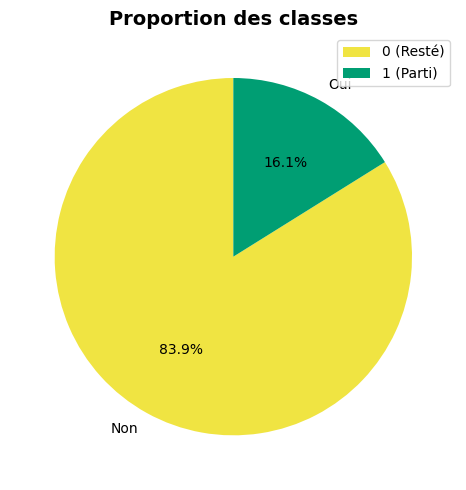


💡 Observation : 16.1% des salariés sont partis de l'entreprise.


In [30]:
fig, axes = plt.subplots(1, 1, figsize=(14, 5))
quitte_oui_non = df_complet['a_quitte_l_entreprise']
quitte_oui = df_complet[quitte_oui_non == 'Oui']
pourcentage_quitte_oui = (len(quitte_oui)/ len(df_complet))*100

# Graphique 2 : Pie chart
colors_pie = ['#F0E442', '#009E73']
quitte_oui_non.value_counts().plot(kind='pie', ax=axes, colors=colors_pie, 
                      autopct='%1.1f%%', startangle=90)
axes.set_title('Proportion des classes', fontsize=14, fontweight='bold')
axes.set_ylabel('')
axes.legend(['0 (Resté)', '1 (Parti)'], loc='upper right')

plt.tight_layout()
plt.show()

print( f"\n💡 Observation : {pourcentage_quitte_oui:.1f}% des salariés sont partis de l'entreprise.")

## 7. Distribution graphique

In [63]:
sns.set_style('whitegrid')
sns.set_palette('husl')


colors = {'Oui': '#f39c12', 'Non': '#3498db'} 

### 7.1 Salaire Vs Attrition

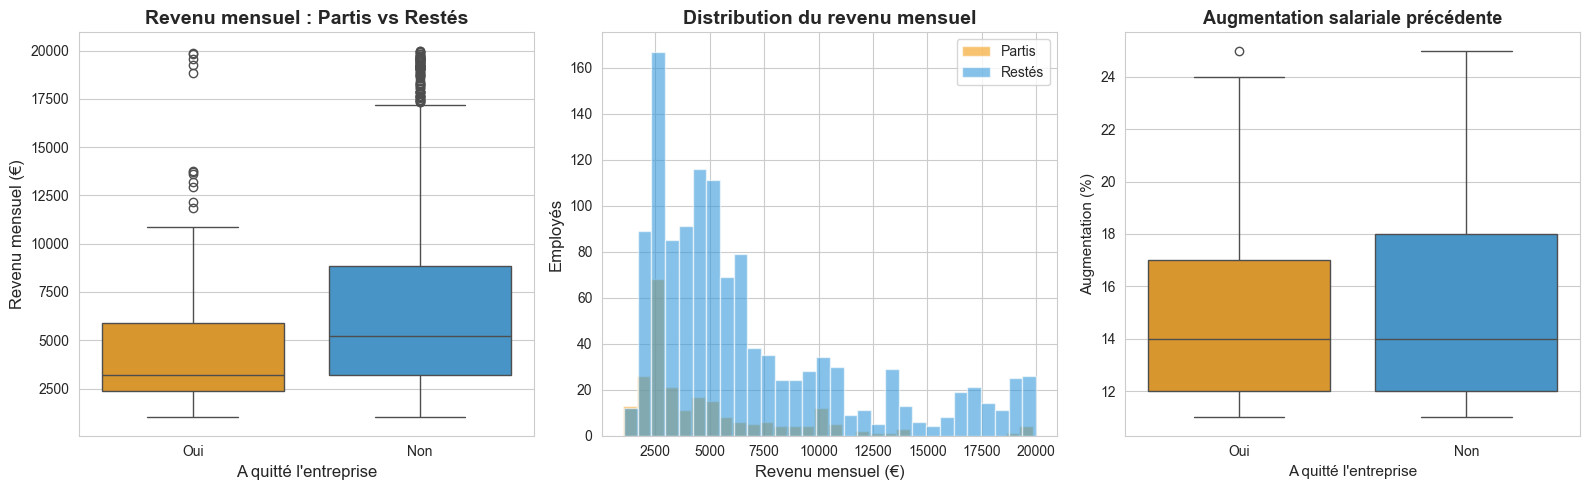


📊 SALAIRE MOYEN :
                         mean  median     std
a_quitte_l_entreprise                        
Non                    6833.0  5204.0  4818.0
Oui                    4787.0  3202.0  3640.0


In [66]:
#Graphique 1 : Revenu mensuel - Partis vs Restés
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Boxplot
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='revenu_mensuel', hue='a_quitte_l_entreprise',
            palette=colors, ax=axes[0])
axes[0].set_title('Revenu mensuel : Partis vs Restés', fontsize=14, fontweight='bold')
axes[0].set_xlabel('A quitté l\'entreprise', fontsize=12)
axes[0].set_ylabel('Revenu mensuel (€)', fontsize=12)

# Histogramme comparatif
df_complet[df_complet['a_quitte_l_entreprise'] == 'Oui']['revenu_mensuel'].hist(
    alpha=0.6, bins=30, label='Partis', color=colors['Oui'], ax=axes[1])
df_complet[df_complet['a_quitte_l_entreprise'] == 'Non']['revenu_mensuel'].hist(
    alpha=0.6, bins=30, label='Restés', color=colors['Non'], ax=axes[1])
axes[1].set_title('Distribution du revenu mensuel', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Revenu mensuel (€)', fontsize=12)
axes[1].set_ylabel('Employés', fontsize=12)
axes[1].legend()

# Augmentation salariale précédente
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='augmentation_salaire_precedente', hue='a_quitte_l_entreprise',
            palette=colors, ax=axes[2])
axes[2].set_title('Augmentation salariale précédente', fontsize=13, fontweight='bold')
axes[2].set_xlabel('A quitté l\'entreprise', fontsize=11)
axes[2].set_ylabel('Augmentation (%)', fontsize=11)

plt.tight_layout()
plt.show()

# Statistiques comparatives
print("\n📊 SALAIRE MOYEN :")
print(df_complet.groupby('a_quitte_l_entreprise')['revenu_mensuel'].agg(['mean', 'median', 'std']).round(0))

---

Les départs concernent les employés ayant moins d'augmentation et dont les revenus sont inférieures aux autres employés. Néanmoins, on constate que ce phénomène ne touche pas la majorité des employés.   
L'écart de revenus sur les salaires peuvent inciter au départ certains employés.

---

### 7.2 Ancienneté Vs Attrition

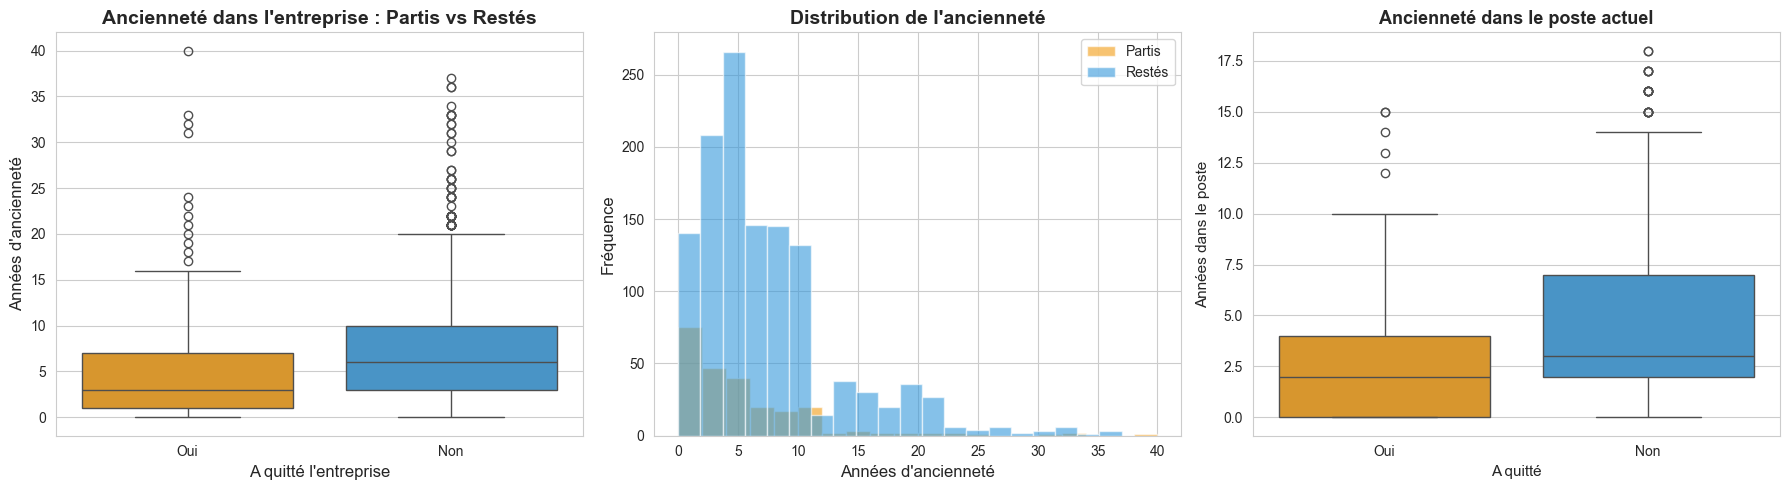


📊 ANCIENNETÉ MOYENNE :
                       mean  median   std
a_quitte_l_entreprise                    
Non                    7.37     6.0  6.10
Oui                    5.13     3.0  5.95

📊 ANCIENNETÉ DANS LE POSTE ACTUEL :
                       mean  median   std
a_quitte_l_entreprise                    
Non                    4.48     3.0  3.65
Oui                    2.90     2.0  3.17


In [67]:
# Graphiques sur l'ancienneté
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot : Ancienneté dans l'entreprise
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='annees_dans_l_entreprise', 
            hue='a_quitte_l_entreprise', palette=colors, ax=axes[0])
axes[0].set_title('Ancienneté dans l\'entreprise : Partis vs Restés', fontsize=14, fontweight='bold')
axes[0].set_xlabel('A quitté l\'entreprise', fontsize=12)
axes[0].set_ylabel('Années d\'ancienneté', fontsize=12)

# Histogramme comparatif
df_complet[df_complet['a_quitte_l_entreprise'] == 'Oui']['annees_dans_l_entreprise'].hist(
    alpha=0.6, bins=20, label='Partis', color=colors['Oui'], ax=axes[1])
df_complet[df_complet['a_quitte_l_entreprise'] == 'Non']['annees_dans_l_entreprise'].hist(
    alpha=0.6, bins=20, label='Restés', color=colors['Non'], ax=axes[1])
axes[1].set_title('Distribution de l\'ancienneté', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Années d\'ancienneté', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].legend()

# Ancienneté dans le poste actuel
sns.boxplot(data=df_complet, x='a_quitte_l_entreprise', y='annees_dans_le_poste_actuel', 
            hue='a_quitte_l_entreprise', palette=colors, ax=axes[2])
axes[2].set_title('Ancienneté dans le poste actuel', fontsize=13, fontweight='bold')
axes[2].set_xlabel('A quitté', fontsize=11)
axes[2].set_ylabel('Années dans le poste', fontsize=11)

plt.tight_layout()
plt.show()

# Statistiques comparatives
print("\n📊 ANCIENNETÉ MOYENNE :")
print(df_complet.groupby('a_quitte_l_entreprise')['annees_dans_l_entreprise'].agg(['mean', 'median', 'std']).round(2))

print("\n📊 ANCIENNETÉ DANS LE POSTE ACTUEL :")
print(df_complet.groupby('a_quitte_l_entreprise')['annees_dans_le_poste_actuel'].agg(['mean', 'median', 'std']).round(2))


---

Les départs concernant les employés qui ont peu d'ancienneté dans l'entreprise, mais aussi dans leur poste.   
Cela peut montrer un sentiment de stagnation dans l'emploi actuel qui les incitent à partir

---

### 7.3 Satisfaction Vs Attrition

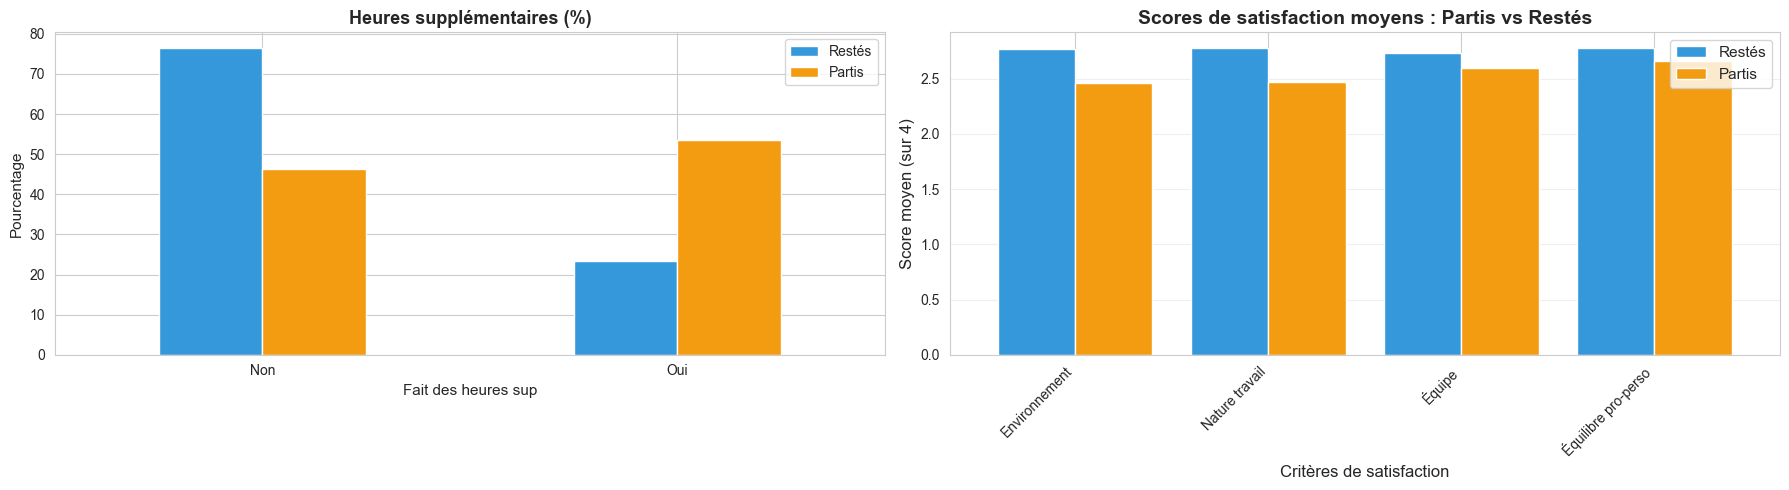

In [71]:
# Graphique 4 : Notes d'évaluation et augmentation salariale
fig, axes = plt.subplots(1, 2, figsize=(18, 5))


# Heures supplémentaires
heures_sup = pd.crosstab(df_complet['a_quitte_l_entreprise'], 
                         df_complet['heure_supplementaires'], 
                         normalize='index') * 100
heures_sup.T.plot(kind='bar', ax=axes[0], color=[colors['Non'], colors['Oui']])
axes[0].set_title('Heures supplémentaires (%)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Fait des heures sup', fontsize=11)
axes[0].set_ylabel('Pourcentage', fontsize=11)
axes[0].legend(['Restés', 'Partis'])
axes[0].set_xticklabels(['Non', 'Oui'], rotation=0)

# Graphique : Scores de satisfaction
colonnes_satisfaction = [
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso'
]

# Calculer les moyennes par groupe
satisfaction_moy = df_complet.groupby('a_quitte_l_entreprise')[colonnes_satisfaction].mean()

# Barplot comparatif
satisfaction_moy.T.plot(kind='bar', ax=axes[1], color=[colors['Non'], colors['Oui']], width=0.8)
axes[1].set_title('Scores de satisfaction moyens : Partis vs Restés', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Critères de satisfaction', fontsize=12)
axes[1].set_ylabel('Score moyen (sur 4)', fontsize=12)
axes[1].set_xticklabels(['Environnement', 'Nature travail', 'Équipe', 'Équilibre pro-perso'], rotation=45, ha='right')
axes[1].legend(['Restés', 'Partis'], fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

Les départs touchent les employés qui font beaucoup d'heures supplémentaires.  
Cela peut montrer une charge de travail trop importante qui incite les départs.

---

### 7.4 Métier Vs Attrition

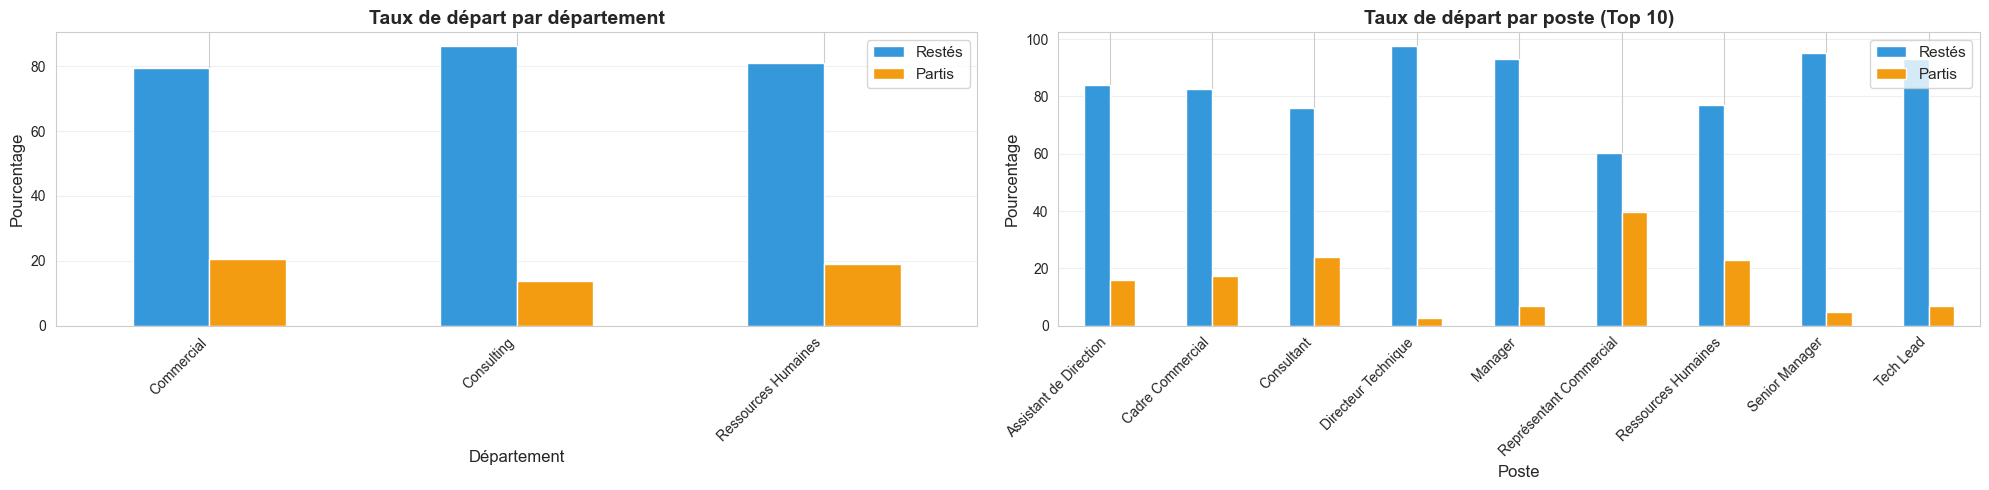

In [35]:
# Graphique 5 : Département et Poste
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Taux de départ par département
dept_attrition = pd.crosstab(df_complet['departement'], 
                             df_complet['a_quitte_l_entreprise'], 
                             normalize='index') * 100
dept_attrition.plot(kind='bar', stacked=False, ax=axes[0], color=[colors['Non'], colors['Oui']])
axes[0].set_title('Taux de départ par département', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Département', fontsize=12)
axes[0].set_ylabel('Pourcentage', fontsize=12)
axes[0].legend(['Restés', 'Partis'], fontsize=11)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Taux de départ par poste (top 10)
top_postes = df_complet['poste'].value_counts().head(10).index
df_top_postes = df_complet[df_complet['poste'].isin(top_postes)]
poste_attrition = pd.crosstab(df_top_postes['poste'], 
                              df_top_postes['a_quitte_l_entreprise'], 
                              normalize='index') * 100
poste_attrition.plot(kind='bar', stacked=False, ax=axes[1], color=[colors['Non'], colors['Oui']])
axes[1].set_title('Taux de départ par poste (Top 10)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Poste', fontsize=12)
axes[1].set_ylabel('Pourcentage', fontsize=12)
axes[1].legend(['Restés', 'Partis'], fontsize=11)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

Les départs touchent certains types de postes de façon plus importantes.  
Cela peut montrer une difficulté sur l'exercice de ce poste qui pousse au départ.

---

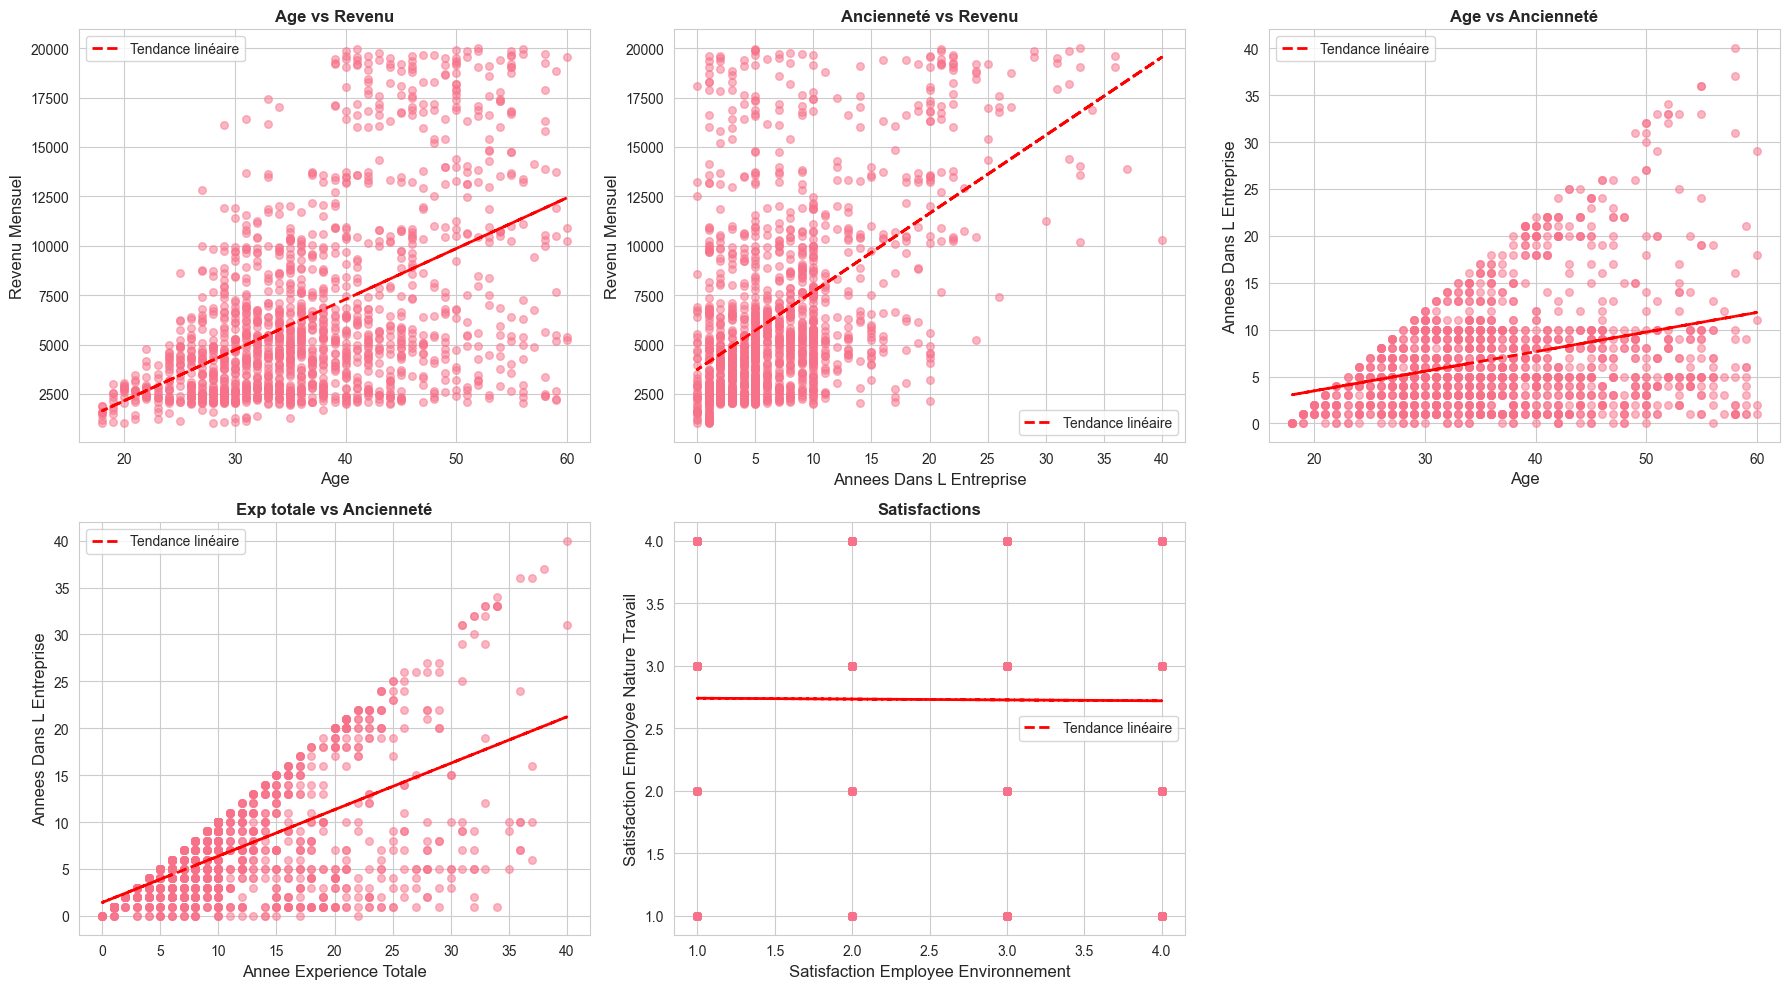

In [73]:
# relations à tester
relations = [
    ('age', 'revenu_mensuel', 'Age vs Revenu'),
    ('annees_dans_l_entreprise', 'revenu_mensuel', 'Ancienneté vs Revenu'),
    ('age', 'annees_dans_l_entreprise', 'Age vs Ancienneté'),
    ('annee_experience_totale', 'annees_dans_l_entreprise', 'Exp totale vs Ancienneté'),
    ('satisfaction_employee_environnement', 'satisfaction_employee_nature_travail', 'Satisfactions')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() 

for idx, (x_col, y_col, titre) in enumerate(relations):
    axes[idx].scatter(df_complet[x_col], df_complet[y_col], alpha=0.5, s=30)
    
    axes[idx].set_xlabel(x_col.replace('_', ' ').title(), fontsize=12)
    axes[idx].set_ylabel(y_col.replace('_', ' ').title(), fontsize=12)
    axes[idx].set_title(titre, fontweight='bold')
    
    z = np.polyfit(df_complet[x_col], df_complet[y_col], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_complet[x_col], p(df_complet[x_col]), 
                   "r--", linewidth=2, label='Tendance linéaire')
    axes[idx].legend()

axes[5].set_visible(False)

plt.tight_layout()
plt.show()


---

Les graphiques montrent une cohérence concernant :
- les revenus par rapport à l'âge
- les revenus par rapport à l'ancienneté
- l'age par rapport à l'ancienneté
- l'experience par rapport à l'ancienneté

---

## 8. Sauvegarde du Dataset

In [37]:
# Sauvegarder le DataFrame fusionné pour les analyses futures
df_complet.to_csv('data_complete.csv', index=False)
print("✅ DataFrame complet sauvegardé dans 'data_complete.csv'")

✅ DataFrame complet sauvegardé dans 'data_complete.csv'


In [38]:
df_complet.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id_employee                                1470 non-null   int64  
 1   age                                        1470 non-null   int64  
 2   genre                                      1470 non-null   str    
 3   revenu_mensuel                             1470 non-null   int64  
 4   statut_marital                             1470 non-null   str    
 5   departement                                1470 non-null   str    
 6   poste                                      1470 non-null   str    
 7   nombre_experiences_precedentes             1470 non-null   int64  
 8   annee_experience_totale                    1470 non-null   int64  
 9   annees_dans_l_entreprise                   1470 non-null   int64  
 10  annees_dans_le_poste_actuel        

In [39]:
display(df_complet.head(10))

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augmentation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,frequence_deplacement_encoded
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,4,2,3,2,4,1,1,3,Oui,11,Oui,0,0,1,2,Infra & Cloud,Occasionnel,0,5,1.0
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,10,10,7,3,2,2,2,4,3,4,Non,23,Non,1,3,8,1,Infra & Cloud,Frequent,1,7,2.0
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,7,0,0,4,2,1,3,2,3,3,Oui,15,Oui,0,3,2,2,Autre,Occasionnel,0,0,1.0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,8,8,7,4,3,1,3,3,3,3,Oui,11,Non,0,3,3,4,Infra & Cloud,Frequent,3,0,2.0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,6,2,2,1,3,1,2,4,3,3,Non,12,Non,1,3,2,1,Transformation Digitale,Occasionnel,2,2,1.0
5,8,32,M,3068,Célibataire,Consulting,Consultant,0,8,7,7,4,3,1,4,3,2,3,Non,13,Non,0,2,2,2,Infra & Cloud,Frequent,3,6,2.0
6,10,59,F,2670,Marié(e),Consulting,Consultant,4,12,1,0,3,4,1,1,1,2,4,Oui,20,Non,3,3,3,3,Transformation Digitale,Occasionnel,0,0,1.0
7,11,30,M,2693,Divorcé(e),Consulting,Consultant,1,1,1,0,4,3,1,3,2,3,4,Non,22,Non,1,2,24,1,Infra & Cloud,Occasionnel,0,0,1.0
8,12,38,M,9526,Célibataire,Consulting,Tech Lead,0,10,9,7,4,2,3,3,2,3,4,Non,21,Non,0,2,23,3,Infra & Cloud,Frequent,1,8,2.0
9,13,36,M,5237,Marié(e),Consulting,Manager,6,17,7,7,3,3,2,3,2,2,3,Non,13,Non,2,3,27,3,Transformation Digitale,Occasionnel,7,7,1.0
